<a href="https://colab.research.google.com/github/1412naman/E-commerce/blob/main/Linear_And_MultipleRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Multiple regression Boston house data 

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

In [ ]:
csv=load_boston();

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
dataset=pd.DataFrame(csv.data)

In [ ]:
dataset.columns=csv.feature_names

In [ ]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
x = dataset.drop(['CHAS', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT'],axis=1).values
y = dataset['LSTAT'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
     

In [ ]:
from sklearn.linear_model import LinearRegression
mlr= LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = mlr.predict(x_test)
print(y_pred)

[26.07269457  9.58610165  9.48946657  3.63792682 12.62501996 12.88310557
 15.57396268 21.70883193  5.88884032 10.8482379  23.61636274  7.81646482
 18.00585095 11.75792926 14.2178764  12.26599104 17.77011242  6.87328448
  9.29528937  6.59157656  5.61284199  3.97090028  9.26289429 16.18972803
 21.82155441 10.74991766 14.46027489  8.86332697  3.55885981 11.38377102
 14.1158676  15.01851738 13.2845746  18.53161556  9.14958991 12.70107139
 15.74910983  7.28338778 15.32082403  2.72185829  9.17391623 16.64923676
 13.99953895  3.822545   10.46537281 15.46960104 13.24298098  7.93891125
  4.9054176  13.7887857  14.75462678 13.63312768 13.06707526 16.6122343
  5.49182308 15.41483807 14.80572045 18.2655879  17.62746611 20.65195757
 10.67477034 10.65771526 14.62801075 15.20649298 15.97897047 16.51286965
  5.00140416  9.04500756  7.5215313  14.28037485 20.45320848 11.45259157
 10.74349111 16.6872139   5.19369474  9.47205921  8.19695871  5.54690179
  6.61699578 14.27197592  0.59238545  7.0999003  13.

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5842917239405893

Simple linear regression

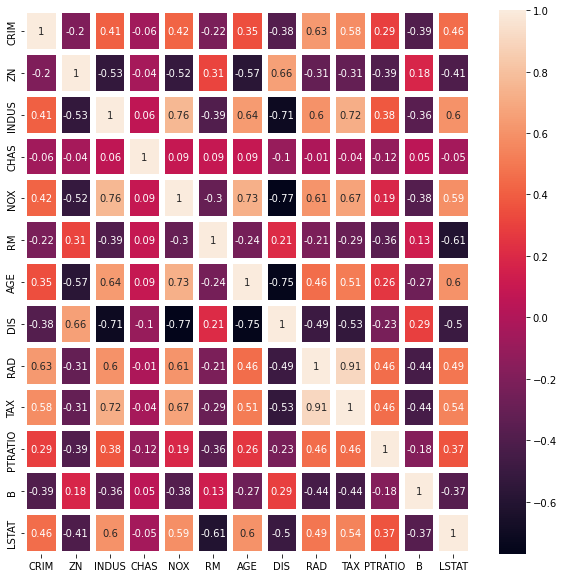

In [ ]:
import seaborn as sns
correlation_matrix = dataset.corr().round(2)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data=correlation_matrix, annot=True,linewidths=5,ax=ax)

In [ ]:
x_array = dataset['RAD'].to_numpy()

In [ ]:
y_array = np.append(y_train,y_test)
print(len(y_array),"      ",len(x_array))

506        506


In [ ]:
def estimated_coef(x,y):
  n=np.size(x)
  m_x,m_y = np.mean(x), np.mean(y)

  SS_xy = np.sum(y*x) - n*m_y*m_x
  SS_xx = np.sum(x*x) - n*m_x*m_x

  b1 = SS_xy/SS_xx
  b0 = m_y - b1*m_x

  return (b0,b1)

In [ ]:
estimated_coef(x_array,y_array)

(13.070608804174142, -0.04372476301989161)

In [ ]:
(beta_0, beta_1) = estimated_coef(x_array,y_array)

def predict_y(x, b0,b1):
  y = b0+b1*x
  return y

y = predict_y(4, beta_0,beta_1)

print(y)

12.895709752094575
